In [ ]:
import pandas as pd
from pathlib import Path
import sys
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
# notebook location
project_root = Path().resolve().parent.parent
sys.path.insert(0, str(project_root))
print("Added to path:", project_root)
from utils.general_utils import open_file

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


base_ft_model_folder = Path(r"/scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft")

baseline_model_folder =  Path("/scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft/baseline_models")

model_base_id = "model_3"               # if everything was correct, same for baseline and ft models
ft_id = "ft_config_1"

baseline_id = "ft_config_2"


subjects = ["S01", "S02", "S03", "S04"]


Added to path: /home/gspacone/Desktop/SilentWear


In [25]:
########### USE
# FT_BASE_MODELS 
# model_1 -> no lr
    # ft_0 -> ft for 10 epochs
    # ft_1 -> ft for 50 epochs
# model 3 -> reduce on plateua
    # ft_0 -> ft for 10 epochs
    # ft_1 -> ft for 50 epochs -> keep this, we have in any case early stopping. Suggested by Alessio. Also saw better performance


## Corresponding Baseline Models
# model1 
    # cf_0 -> lr=1e-4
    # cf_1 -> lr =1e-3

# model3 
    # cf_0 -> lr=1e-4
    # cf_1 -> lr=1e-3 first epoch, then 1e-4
    # cf_2 -> lr =1e-3

In [26]:
summary_condition = []
condition = 'silent'
for subject_id in subjects:    
    results_path = base_ft_model_folder/f"{subject_id}/{condition}/speechnet_base/{model_base_id}/{ft_id}/ft_summary.csv"

    ft_cfg_file = base_ft_model_folder/f"{subject_id}/{condition}/speechnet_base/{model_base_id}/{ft_id}/ft_cfg.json"
    print("Reading FT cf file",ft_cfg_file )
    ft_cfg= open_file(ft_cfg_file)
    # read the scheduler
    sched_name=ft_cfg["model"]["kwargs"]["train_cfg"].get("scheduler")
    if sched_name:
        sched_name = sched_name["name"]
        print(sched_name)
    else:
        sched_name = "no_sched"

    summary_ft_csv = pd.read_csv(results_path)
    groups = summary_ft_csv.groupby(["num_prev_ft_rounds", "zero_shot_test_batch"])

    num_prev_ft_rounds = []
    accuracies_means = []
    accuracies_std = []
    for group_key, group_df in groups:
        # compute accuracies here
        num_prev_ft_rounds.append(group_df["num_prev_ft_rounds"].unique()[0])
        # Aggregate accuracy for this specific subject - condition
        mean_acc_subj = np.mean(group_df["zero_shot_balanced_acc"].values)
        mean_std_subj = np.std(group_df["zero_shot_balanced_acc"].values)
        accuracies_means.append(mean_acc_subj)
        accuracies_std.append(mean_std_subj)

    accuracies_means = np.array(accuracies_means) * 100
    accuracies_std = np.array(accuracies_std) * 100

    summary_subject = {
        "subject_id" : subject_id, 
        "subj_acc_means" : accuracies_means, 
        "subjs_acc_std" : accuracies_std,
        "num_prev_ft_rounds" : np.array(num_prev_ft_rounds),  
        "scheduler" : sched_name
    }

    summary_condition.append(summary_subject)


summary_condition_baseline = []

for subject_id in subjects: 

    results_path = baseline_model_folder/f"{subject_id}/{condition}/speechnet_base/{model_base_id}/{baseline_id}/ft_summary.csv"
    if results_path.exists() == False:
        print("File:", results_path, "not found")
        continue
    ft_cfg_file = baseline_model_folder/f"{subject_id}/{condition}/speechnet_base/{model_base_id}/{baseline_id}/ft_cfg.json"
    print("Reading Baseline file",ft_cfg_file )
    ft_cfg= open_file(ft_cfg_file)
    # read the scheduler
    sched_name=ft_cfg["model"]["kwargs"]["train_cfg"].get("scheduler")
    if sched_name:
        sched_name = sched_name["name"]
        print(sched_name)
    else:
        sched_name = "no_sched"
    summary_ft_csv = pd.read_csv(results_path)
    groups = summary_ft_csv.groupby(["num_prev_ft_rounds", "zero_shot_test_batch"])

    num_prev_ft_rounds = []
    accuracies_means = []
    accuracies_std = []
    for group_key, group_df in groups:
        # compute accuracies here
        num_prev_ft_rounds.append(group_df["num_prev_ft_rounds"].unique()[0])
        # Aggregate accuracy for this specific subject - condition
        mean_acc_subj = np.mean(group_df["zero_shot_balanced_acc"].values)
        mean_std_subj = np.std(group_df["zero_shot_balanced_acc"].values)
        accuracies_means.append(mean_acc_subj)
        accuracies_std.append(mean_std_subj)

    accuracies_means = np.array(accuracies_means) * 100
    accuracies_std = np.array(accuracies_std) * 100

    summary_subject = {
        "subject_id" : subject_id, 
        "subj_acc_means" : accuracies_means, 
        "subjs_acc_std" : accuracies_std,
        "num_prev_ft_rounds" : np.array(num_prev_ft_rounds),  
        "scheduler" : sched_name
    }

    summary_condition_baseline.append(summary_subject)


Reading FT cf file /scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft/S01/silent/speechnet_base/model_3/ft_config_1/ft_cfg.json
ReduceLROnPlateau
Reading FT cf file /scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft/S02/silent/speechnet_base/model_3/ft_config_1/ft_cfg.json
ReduceLROnPlateau
Reading FT cf file /scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft/S03/silent/speechnet_base/model_3/ft_config_1/ft_cfg.json
ReduceLROnPlateau
Reading FT cf file /scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft/S04/silent/speechnet_base/model_3/ft_config_1/ft_cfg.json
ReduceLROnPlateau
Reading Baseline file /scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft/baseline_models/S01/silent/speechnet_base/model_3/ft_config_2/ft_cfg.json
ReduceLROnPlateau
Reading Baseline file /scratch2/gspacone/sensors_2026_speech_models/models/inter_session_ft/baseline_models/S02/silent/speechnet_base/model_3/ft_config_2/ft

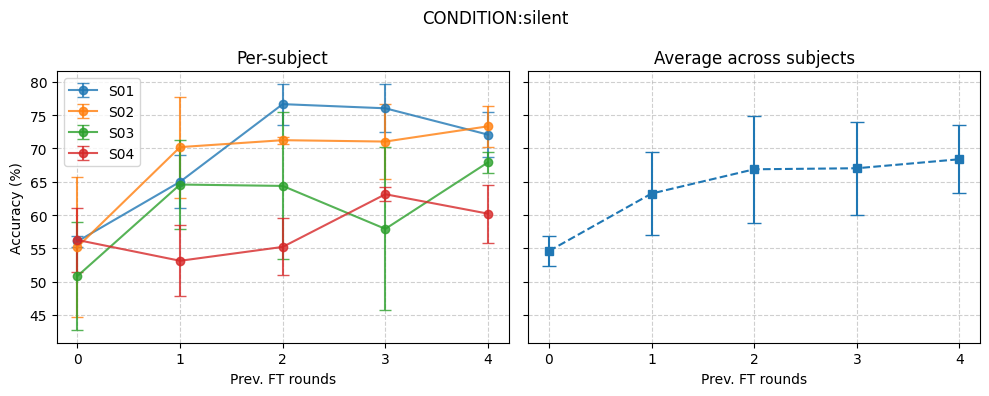

In [27]:

all_means = np.stack([s["subj_acc_means"] for s in summary_condition], axis=0)
all_stds  = np.stack([s["subjs_acc_std"] for s in summary_condition], axis=0)

avg_mean = all_means.mean(axis=0)
avg_std  = np.std(all_means, axis=0)   # inter-subject variability

x_ticks = summary_condition[0]["num_prev_ft_rounds"]

# ---- Figure with two subplots (side by side) ----
fig, (ax_left, ax_right) = plt.subplots(
    1, 2, figsize=(10, 4), sharex=True, sharey=True
)

# ---- LEFT: per-subject curves ----
for subj in summary_condition:
    ax_left.errorbar(
        subj["num_prev_ft_rounds"],
        subj["subj_acc_means"],
        yerr=subj["subjs_acc_std"],
        marker="o",
        linestyle="-",
        capsize=4,
        label=subj["subject_id"],
        alpha=0.8,
    )

ax_left.set_xticks(x_ticks)
ax_left.set_xlabel("Prev. FT rounds")
ax_left.set_ylabel("Accuracy (%)")
ax_left.set_title("Per-subject")
ax_left.grid(True, linestyle="--", alpha=0.6)
ax_left.legend()

# ---- RIGHT: average across subjects ----
ax_right.errorbar(
    x_ticks,
    avg_mean,
    yerr=avg_std,
    marker="s",
    linestyle="--",
    capsize=5,
)

ax_right.set_xticks(x_ticks)
ax_right.set_xlabel("Prev. FT rounds")
ax_right.set_title("Average across subjects")
ax_right.grid(True, linestyle="--", alpha=0.6)

plt.suptitle(f"CONDITION:{condition}")
plt.tight_layout()
plt.show()

In [28]:

# --- helpers: map by subject for easy overlay ---
ft_by_subj = {s["subject_id"]: s for s in summary_condition}
bl_by_subj = {s["subject_id"]: s for s in summary_condition_baseline}

# --- compute averages (FT) ---
all_means_ft = np.stack([s["subj_acc_means"] for s in summary_condition], axis=0)
avg_mean_ft = all_means_ft.mean(axis=0)
avg_std_ft = np.std(all_means_ft, axis=0)  # inter-subject variability

# --- compute averages (baseline) over subjects that actually exist in baseline list ---
if len(summary_condition_baseline) > 0:
    all_means_bl = np.stack([s["subj_acc_means"] for s in summary_condition_baseline], axis=0)
    avg_mean_bl = all_means_bl.mean(axis=0)
    avg_std_bl = np.std(all_means_bl, axis=0)
else:
    avg_mean_bl, avg_std_bl = None, None

In [29]:
schedulers = [s['scheduler'] for s in summary_condition]
scheduler_ft = np.unique(schedulers)[0] if len(np.unique(schedulers)) == 1 else "NOT UNIQUE"
schedulers = [s['scheduler'] for s in summary_condition_baseline]
scheduler_bs = np.unique(schedulers)[0] if len(np.unique(schedulers)) == 1 else "NOT UNIQUE"

if scheduler_ft!=scheduler_bs:
    print("error")
    sched_name = "NOT UNIQUE"
else:
    sched_name = scheduler_ft

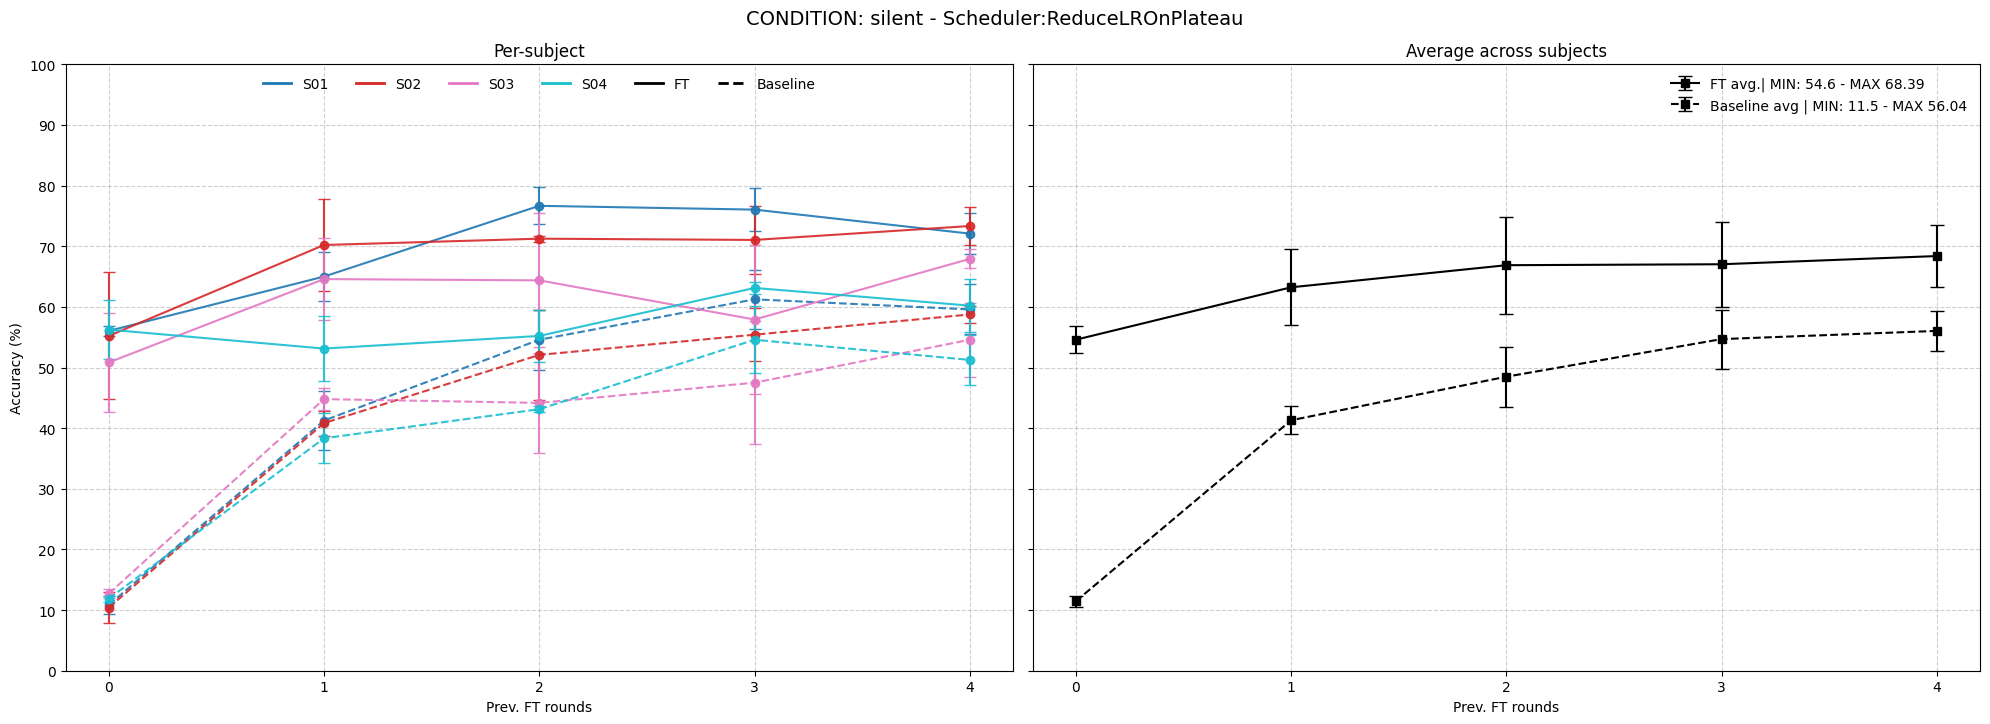

In [30]:


# --- assign one color per subject ---
subject_ids = [s["subject_id"] for s in summary_condition]
colors = plt.cm.tab10(np.linspace(0, 1, len(subject_ids)))
color_by_subject = dict(zip(subject_ids, colors))

# ---- Bigger figure ----
fig, (ax_left, ax_right) = plt.subplots(
    1, 2, figsize=(20, 8), sharex=True, sharey=True
)

# ---- LEFT: per-subject curves ----
for subject_id, subj_ft in ft_by_subj.items():
    c = color_by_subject[subject_id]

    # FT (solid)
    ax_left.errorbar(
        subj_ft["num_prev_ft_rounds"],
        subj_ft["subj_acc_means"],
        yerr=subj_ft["subjs_acc_std"],
        marker="o",
        linestyle="-",
        color=c,
        capsize=4,
        alpha=0.9,
    )

    # Baseline (dashed)
    subj_bl = bl_by_subj.get(subject_id, None)
    if subj_bl is not None:
        ax_left.errorbar(
            subj_bl["num_prev_ft_rounds"],
            subj_bl["subj_acc_means"],
            yerr=subj_bl["subjs_acc_std"],
            marker="o",
            linestyle="--",
            color=c,
            capsize=4,
            alpha=0.9,
        )

ax_left.set_xticks(x_ticks)
ax_left.set_xlabel("Prev. FT rounds")
ax_left.set_ylabel("Accuracy (%)")
ax_left.set_title("Per-subject")
ax_left.grid(True, linestyle="--", alpha=0.6)

# ---- Custom legend: ONE line ----
subject_handles = [
    Line2D([0], [0], color=color_by_subject[s], lw=2, label=s)
    for s in subject_ids
]

style_handles = [
    Line2D([0], [0], color="black", lw=2, linestyle="-", label="FT"),
    Line2D([0], [0], color="black", lw=2, linestyle="--", label="Baseline"),
]

ax_left.legend(
    handles=subject_handles + style_handles,
    loc="upper center",
   #bbox_to_anchor=(0.5, -0.22),
    ncol=len(subject_handles) + 2,   # ONE LINE
    frameon=False,
)

# ---- RIGHT: average across subjects ----
ax_right.errorbar(
    x_ticks,
    avg_mean_ft,
    yerr=avg_std_ft,
    marker="s",
    linestyle="-",
    color="black",
    capsize=5,
    label=f"FT avg.| MIN: {min(avg_mean_ft):.1f} - MAX {max(avg_mean_ft):.2f}",
)

if avg_mean_bl is not None:
    ax_right.errorbar(
        x_ticks,
        avg_mean_bl,
        yerr=avg_std_bl,
        marker="s",
        linestyle="--",
        color="black",
        capsize=5,
        label=f"Baseline avg | MIN: {min(avg_mean_bl):.1f} - MAX {max(avg_mean_bl):.2f}",
    )

ax_right.set_xticks(x_ticks)
ax_right.set_xlabel("Prev. FT rounds")
ax_right.set_title("Average across subjects")
ax_right.set_yticks(np.arange(0, 101, 10))
ax_right.grid(True, linestyle="--", alpha=0.6)
ax_right.legend(frameon=False)
ax_right.set_ylim([0, 100])

plt.suptitle(f"CONDITION: {condition} - Scheduler:{sched_name}", fontsize=14)
plt.tight_layout(rect=[0, 0.08, 1, 1])  # leave space for legend
plt.show()
